In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the customer behavior data
customer_data = pd.read_csv('purchase_behaviour.csv')

In [16]:
# To Display the first few rows of the data
print("Customer Data Preview:")
customer_data.head()

Customer Data Preview:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


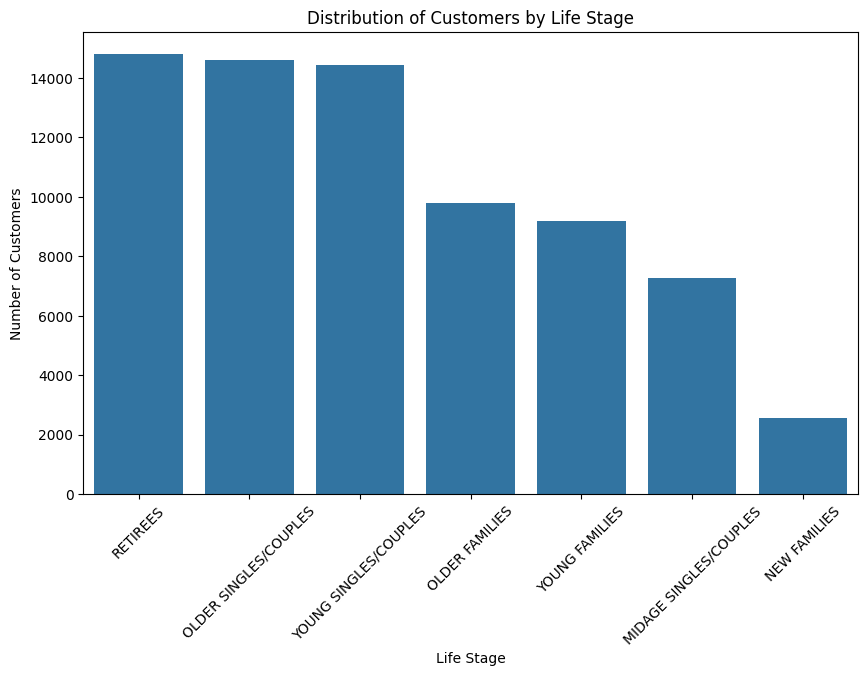

In [10]:
# To Visualize the distribution of customers by life stage
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x="LIFESTAGE", order=customer_data["LIFESTAGE"].value_counts().index)
plt.title("Distribution of Customers by Life Stage")
plt.xlabel("Life Stage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

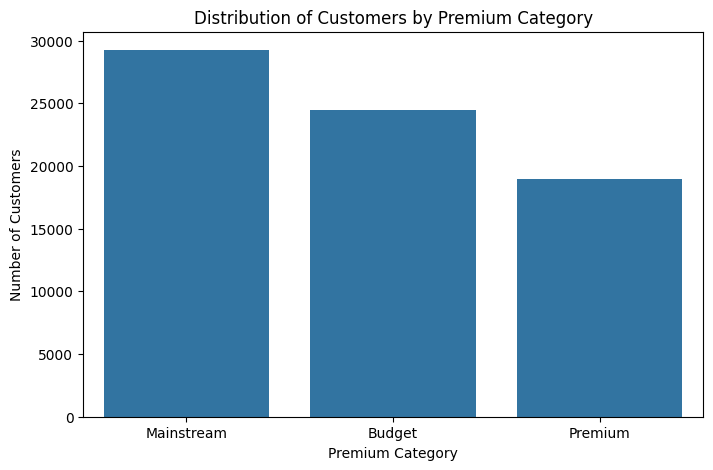

In [11]:
# To Visualize the distribution of customers by premium category
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x="PREMIUM_CUSTOMER", order=customer_data["PREMIUM_CUSTOMER"].value_counts().index)
plt.title("Distribution of Customers by Premium Category")
plt.xlabel("Premium Category")
plt.ylabel("Number of Customers")
plt.show()

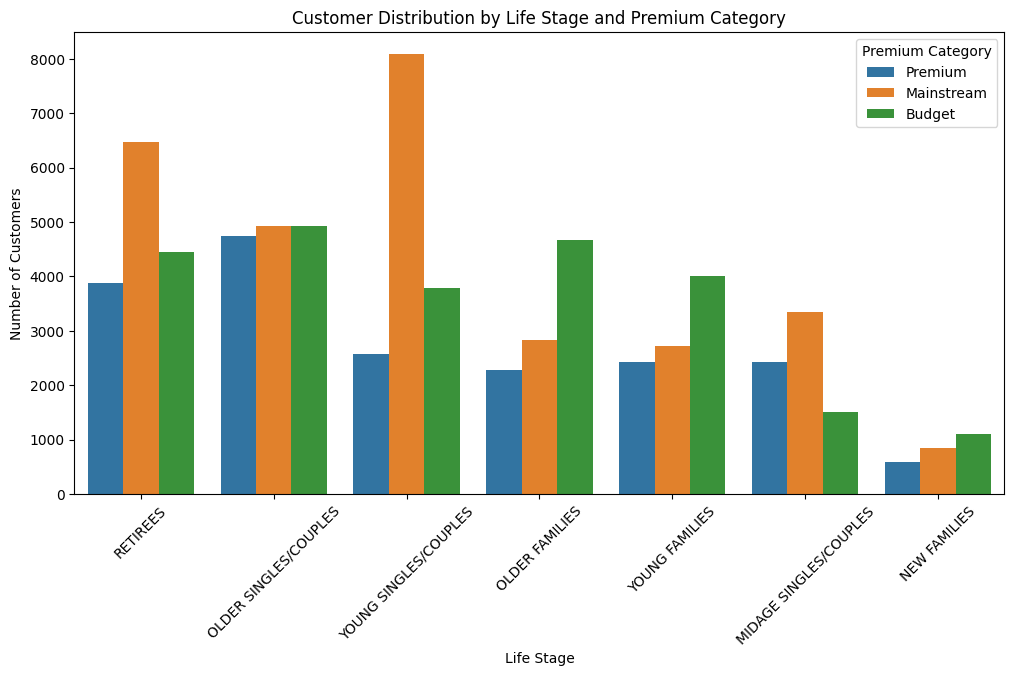

In [12]:
# To Visualize the combined distribution of customers by life stage and premium category
plt.figure(figsize=(12, 6))
sns.countplot(data=customer_data, x="LIFESTAGE", hue="PREMIUM_CUSTOMER", order=customer_data["LIFESTAGE"].value_counts().index)
plt.title("Customer Distribution by Life Stage and Premium Category")
plt.xlabel("Life Stage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title="Premium Category")
plt.show()


In [15]:
# To Load the transaction data
transaction_data = pd.read_csv('transaction_data.csv')

# To Display the first few rows of the transaction data
print("Transaction Data Preview:")
transaction_data.head()

Transaction Data Preview:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
# To Identify the top 3 most profitable products by total sales
top_products_by_sales = transaction_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products_by_sales = top_products_by_sales.sort_values(by='TOT_SALES', ascending=False).head(3)

print("\nTop 3 Most Profitable Products by Sales:")
top_products_by_sales


Top 3 Most Profitable Products by Sales:


,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [20]:
# To Identify the top 3 bestselling products by quantity sold
top_products_by_quantity = transaction_data.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()
top_products_by_quantity = top_products_by_quantity.sort_values(by='PROD_QTY', ascending=False).head(3)

print("\nTop 3 Bestselling Products by Quantity:")
top_products_by_quantity


Top 3 Bestselling Products by Quantity:


,PROD_NAME,PROD_QTY
11,Dorito Corn Chp Supreme 380g,6509
33,Kettle Mozzarella Basil & Pesto 175g,6381
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309


In [21]:
# To Identify the top 10 most loyal customers by total spending
loyal_customers_by_spending = transaction_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
loyal_customers_by_spending = loyal_customers_by_spending.sort_values(by='TOT_SALES', ascending=False).head(10)

print("\nTop 10 Most Loyal Customers by Total Spending:")
loyal_customers_by_spending


Top 10 Most Loyal Customers by Total Spending:


,LYLTY_CARD_NBR,TOT_SALES
59694,226000,1300.00
60925,230078,138.60
17292,63197,132.80
69017,259009,127.20
42813,162039,126.80
16001,58361,124.80
61001,230154,124.40
25958,94185,122.80
35338,130090,122.65
47959,179228,120.80


In [22]:
# To Merge transaction data with customer data to analyze customer segments
merged_data = transaction_data.merge(customer_data, on='LYLTY_CARD_NBR', how='left')

In [26]:
# TO Analyze the characteristics of the most loyal customers
loyal_customer_segments = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Count')
loyal_customer_segments = loyal_customer_segments.sort_values(by='Count', ascending=False)

print("\nTop Characteristics of Loyal Customers:")
loyal_customer_segments.head(5)


Top Characteristics of Loyal Customers:


,LIFESTAGE,PREMIUM_CUSTOMER,Count
6,OLDER FAMILIES,Budget,23160
13,RETIREES,Mainstream,21466
19,YOUNG SINGLES/COUPLES,Mainstream,20854
15,YOUNG FAMILIES,Budget,19122
9,OLDER SINGLES/COUPLES,Budget,18407


In [28]:
# To Calculate the average spending per transaction for each customer
avg_spending_per_customer = merged_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean().reset_index()

print("\nAverage Spending per Transaction for Customers:")
avg_spending_per_customer.describe()


Average Spending per Transaction for Customers:


,LYLTY_CARD_NBR,TOT_SALES
count,7.263700e+04,72637.000000
mean,1.361859e+05,7.107758
std,8.989293e+04,3.204004
min,1.000000e+03,1.500000
25%,6.620200e+04,5.892308
50%,1.340400e+05,7.400000
75%,2.033750e+05,8.571429
max,2.373711e+06,650.000000


In [30]:
# Calculate the average spending per customer segment (life stage and premium category)
avg_spending_per_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()

print("\nAverage Spending per Customer Segment:")
avg_spending_per_segment


Average Spending per Customer Segment:


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,7.074661
1,MIDAGE SINGLES/COUPLES,Mainstream,7.647284
2,MIDAGE SINGLES/COUPLES,Premium,7.112056
3,NEW FAMILIES,Budget,7.297321
4,NEW FAMILIES,Mainstream,7.317806
5,NEW FAMILIES,Premium,7.231655
6,OLDER FAMILIES,Budget,7.269570
7,OLDER FAMILIES,Mainstream,7.262395
8,OLDER FAMILIES,Premium,7.322945
9,OLDER SINGLES/COUPLES,Budget,7.430315


In [32]:

# To Analyze purchase frequency by customer segment
purchase_frequency = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Purchase_Count')
purchase_frequency = purchase_frequency.sort_values(by='Purchase_Count', ascending=False)

print("\nPurchase Frequency by Customer Segment:")
purchase_frequency.head(5)


Purchase Frequency by Customer Segment:


,LIFESTAGE,PREMIUM_CUSTOMER,Purchase_Count
6,OLDER FAMILIES,Budget,23160
13,RETIREES,Mainstream,21466
19,YOUNG SINGLES/COUPLES,Mainstream,20854
15,YOUNG FAMILIES,Budget,19122
9,OLDER SINGLES/COUPLES,Budget,18407
